# 1.Setup

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2.Load Dataset

In [3]:
file_path = r"E:\My Drive\Indonesia AI\Fundamental NLP\Project 1\Data_Processed\tweet_bersih.csv"

try:
    df = pd.read_csv(file_path)
    print('File berhasil dimuat!')
except FileNotFoundError:
    print("File tidak ditemukan. Pastikan file path benar!")

File berhasil dimuat!


# 3.Persiapan Modelling

In [4]:
X = df['tweet_bersih'].astype(str)
y = df['sentimen']

print("Feature sample:", X.head())
print("Label sample:", y.head())

Feature sample: 0    prabowo indonesia tidak dihargai bangsa asing ...
1    batuan langka hadiah habib luthfi seharga mercy ?
2          era indonesia baik indonesiamaju jokowilagi
3    sumatera selatan asian games berdampak percaya...
4    negara ngutang bingung infrastruktur dipakai m...
Name: tweet_bersih, dtype: object
Label sample: 0    negatif
1     netral
2     netral
3    positif
4    negatif
Name: sentimen, dtype: object


## Vektorisasi

In [5]:
# --- FEATURE ENGINEERING ---
# 1. Membuat fitur dari teks (TF-IDF)
vectorizer = TfidfVectorizer(max_features=800, min_df=3, ngram_range=(1, 3))
X_tfidf = vectorizer.fit_transform(X)

# 2. Membuat fitur 'ada_tanda_tanya'
X_feature_tanya = df['tweet_bersih'].apply(lambda x: 1 if '?' in str(x) else 0)

# --- PENGGABUNGAN FITUR ✨---
# Menggabungkan matriks TF-IDF dengan fitur baru kita.
# .values.reshape(-1, 1) mengubah pandas Series menjadi format yang benar untuk digabungkan.
X = hstack([X_tfidf, X_feature_tanya.values.reshape(-1,1)])

# --- MENDEFINISIKAN TARGET ---
y = df['sentimen']

# --- SELESAI PREPROCESSING ---
print("✅ Tahap Preprocessing Selesai!")
print(f"Bentuk (shape) matriks fitur X final: {X.shape}")
print(f"Bentuk (shape) target y final: {y.shape}")

# --- SPLITTING DATA ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
print(f'\nUkuran data latih(X_train): {X_train.shape[0]}')
print(f'Ukuran data uji(X_test): {X_test.shape[0]}')

✅ Tahap Preprocessing Selesai!
Bentuk (shape) matriks fitur X final: (1815, 801)
Bentuk (shape) target y final: (1815,)

Ukuran data latih(X_train): 1452
Ukuran data uji(X_test): 363


# 4.Training Model

In [6]:
model = LogisticRegression(random_state=16, C=0.5)

model.fit(X_train, y_train)

LogisticRegression(C=0.5, random_state=16)

# 5.Evaluation


--- Hasil Evaluasi Model Logistic Regression ---
Akurasi Data Latih: 76.45%
Akurasi Data Uji (Test): 65.29%

Laporan Klasifikasi Data Uji:
              precision    recall  f1-score   support

     negatif       0.67      0.64      0.65       116
      netral       0.67      0.67      0.67       124
     positif       0.62      0.65      0.64       123

    accuracy                           0.65       363
   macro avg       0.65      0.65      0.65       363
weighted avg       0.65      0.65      0.65       363


Confusion Matrix Data Uji:


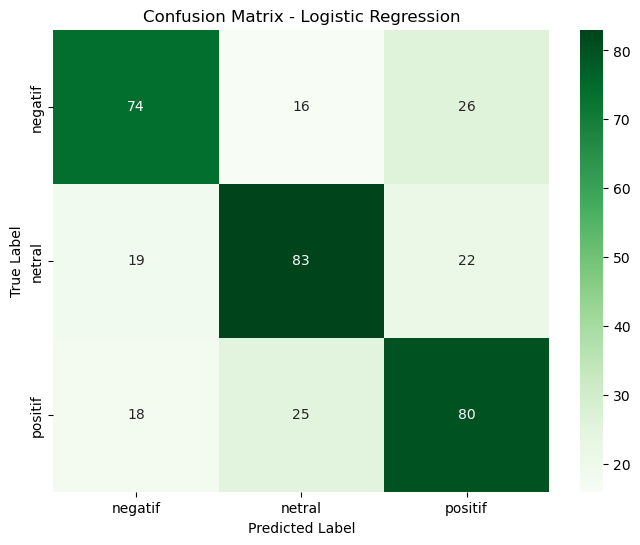

In [7]:
# Melakukan Prediksi
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("\n--- Hasil Evaluasi Model Logistic Regression ---")

# Akurasi pada data latih (untuk mengecek overfitting)
print(f"Akurasi Data Latih: {accuracy_score(y_train, y_pred_train):.2%}")

# Akurasi pada data uji (performa model sesungguhnya)
print(f"Akurasi Data Uji (Test): {accuracy_score(y_test, y_pred_test):.2%}")

print("\nLaporan Klasifikasi Data Uji:")
print(classification_report(y_test, y_pred_test))

# 8. Visualisasi Confusion Matrix
print("\nConfusion Matrix Data Uji:")
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
